In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

Mising data 

 mising data identification 


In [6]:
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

missing data strategy
- identufy missing data
- discard the columns having too much of missing data (>25%)
- treat/impute the missing entries
    - try to fill fake entries which doesnt impact overall data
        - fill using mean values ( numerical data )
        - fill using some imputers ( categorical data )
- discard the rows having missing entries , if the missing entries r too less (<5%)

In [8]:
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

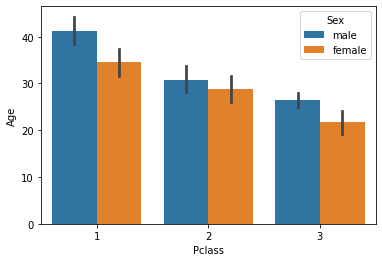

In [11]:
sns.barplot(data=df, y ='Age', x = 'Pclass',hue='Sex')

# EDA

In [12]:
target_cols = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket','Cabin']

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


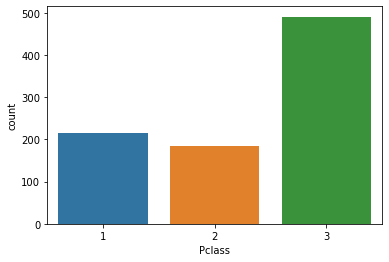

Sex
male      577
female    314
Name: Sex, dtype: int64


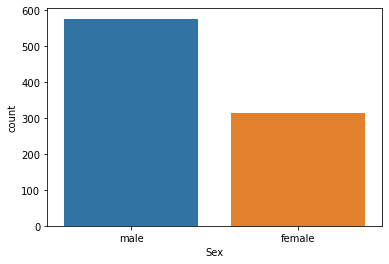

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


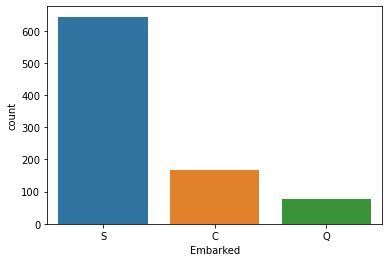

In [14]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts())
    sns.countplot(data=df,x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)    

Age


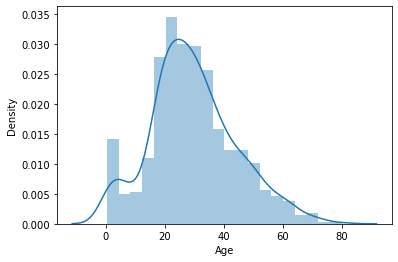

SibSp


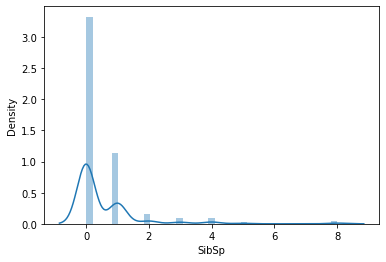

Parch


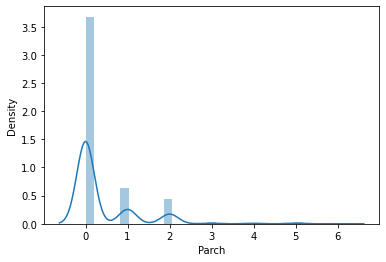

Fare


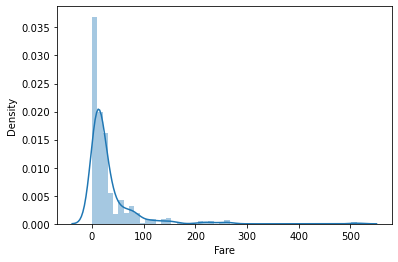

In [15]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)    

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


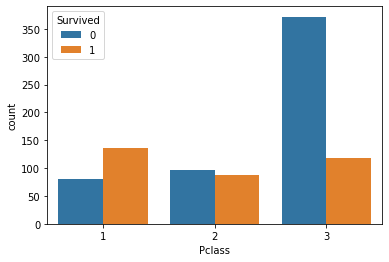

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


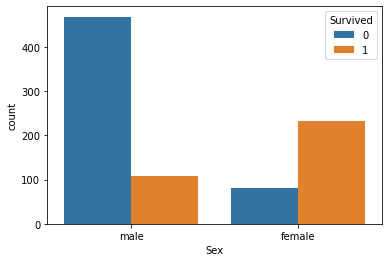

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


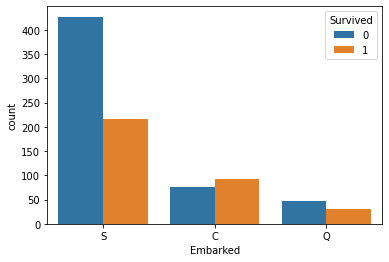

In [16]:
def col_bivariate(col):
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df, x=col, hue=target_cols)
    plt.show()

for col in cat_cols:
    col_bivariate(col)

Age


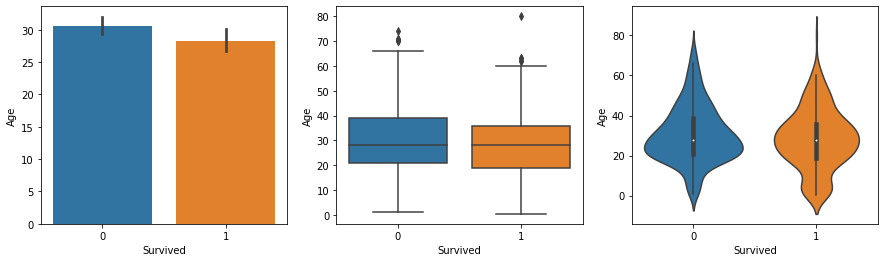

SibSp


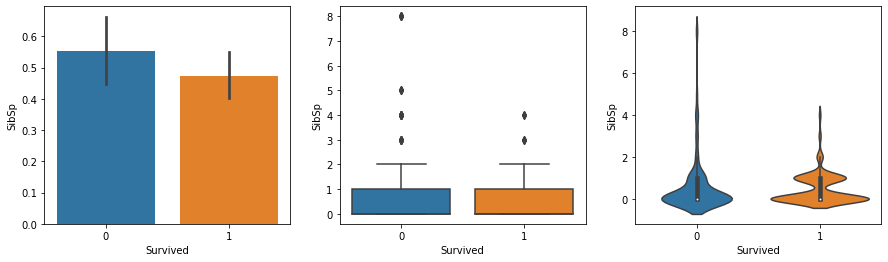

Parch


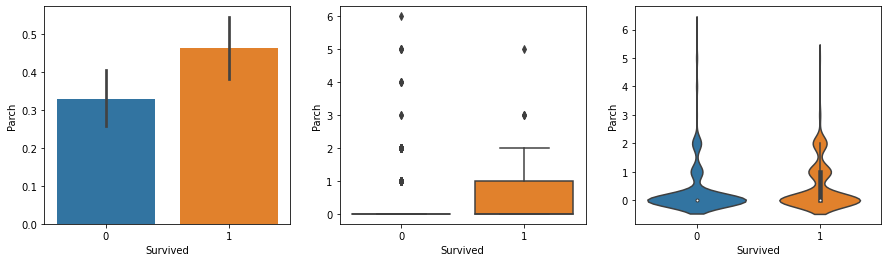

Fare


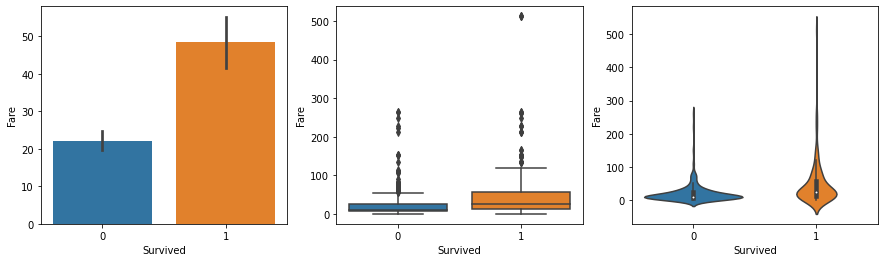

In [17]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df, x=target_cols, y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df, x=target_cols, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=target_cols, y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

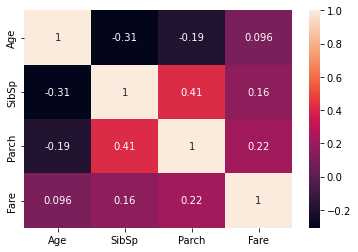

In [18]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [19]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

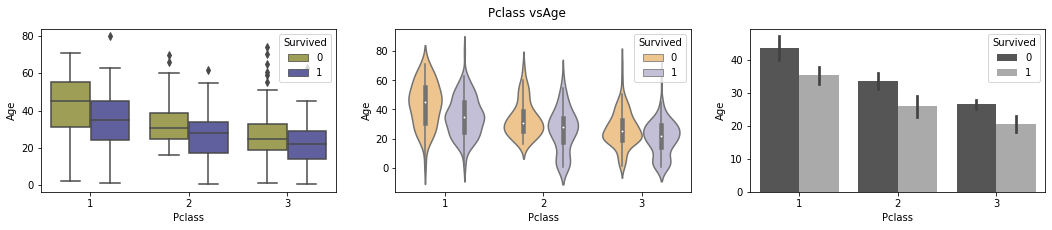

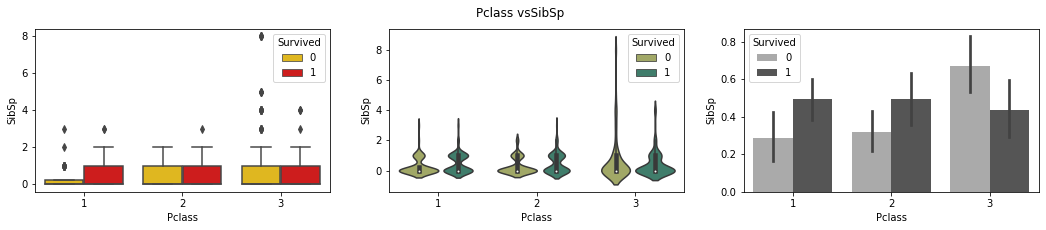

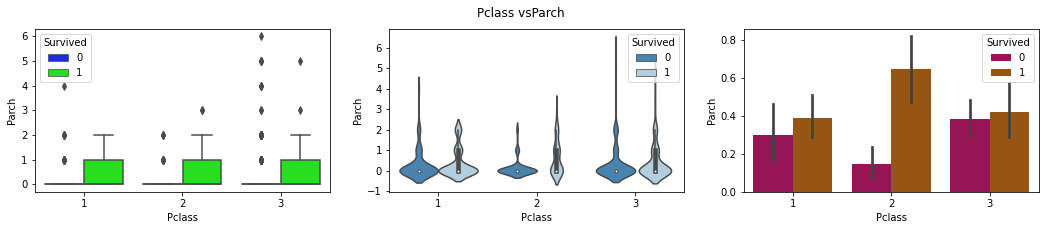

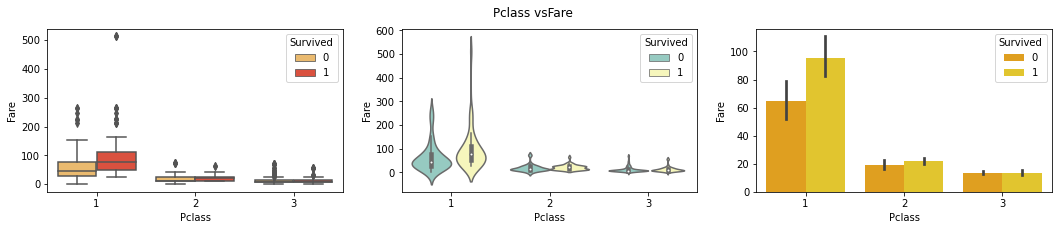

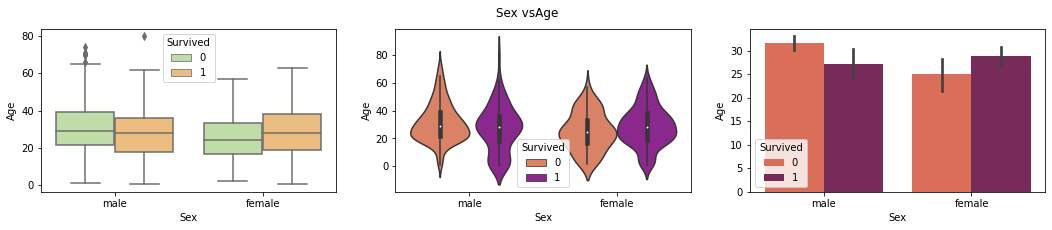

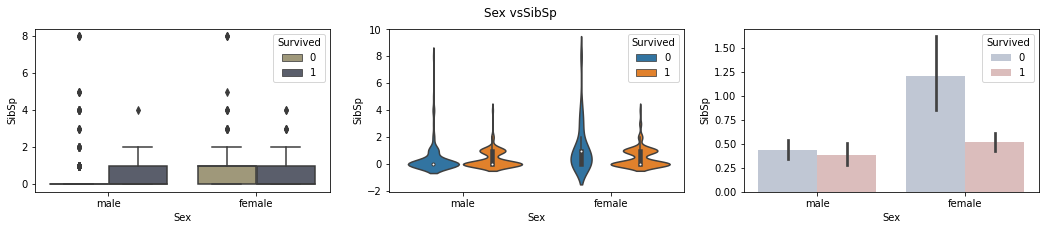

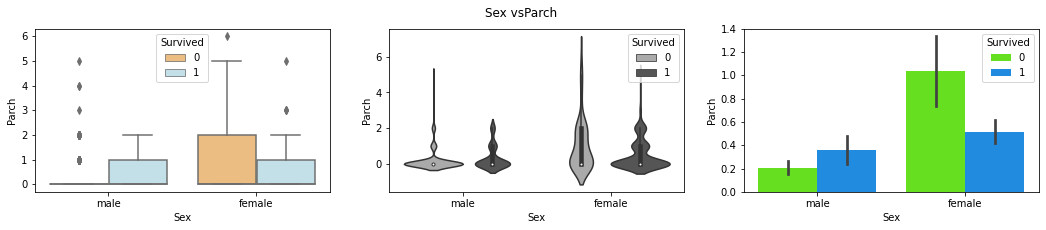

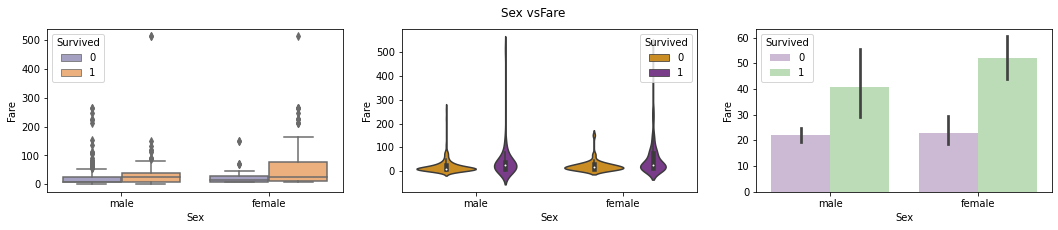

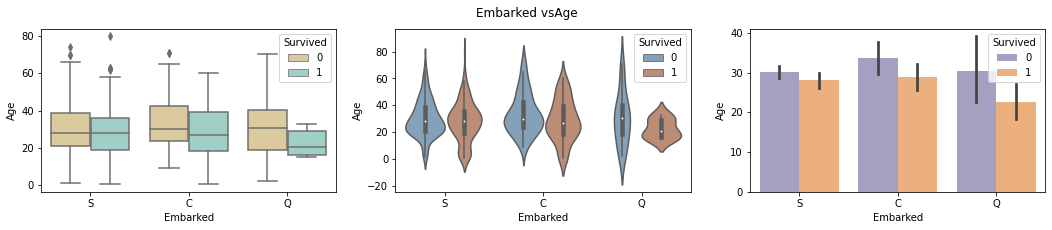

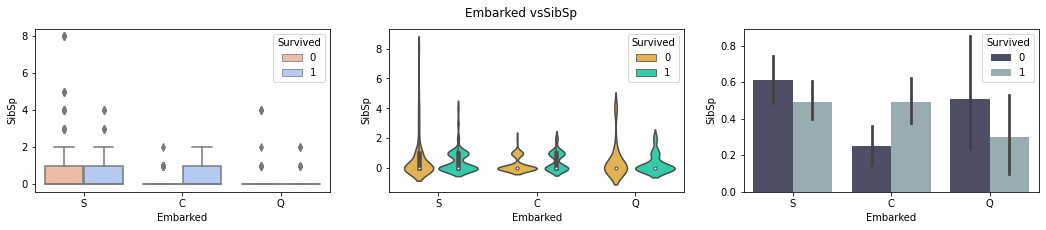

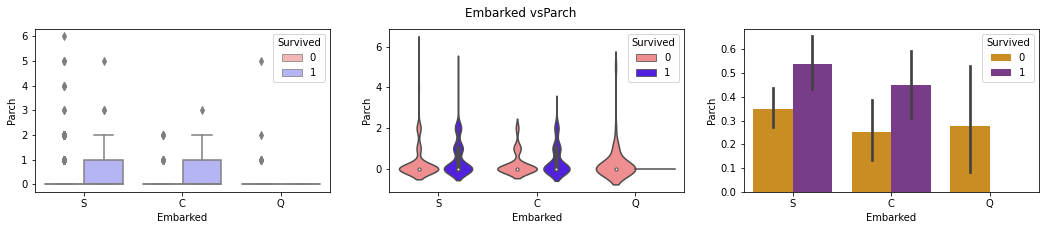

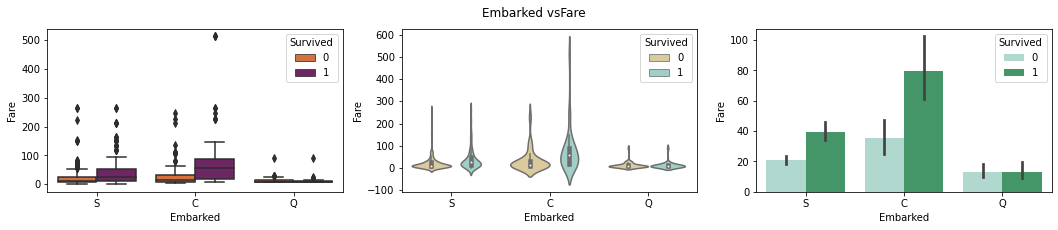

In [20]:
for col in cat_cols:
    if col == target_cols:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs{ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data=df, x=col, y=ncol, hue= target_cols, palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(data=df, x=col, y=ncol, hue= target_cols, palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(data=df, x=col, y=ncol, hue= target_cols, palette=choice(p_list))
        plt.show()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df.drop('Ticket', axis=1, inplace=True)

In [23]:
df.drop('PassengerId', axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [25]:
df.drop('Name', axis=1, inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
# impute the fake entries in missing Age Information
def age_imputer(data):
    age= data['Age']
    pclass = data['Pclass']
    sex = data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df['Age'] = df.apply(age_imputer, axis=1)

<AxesSubplot:>

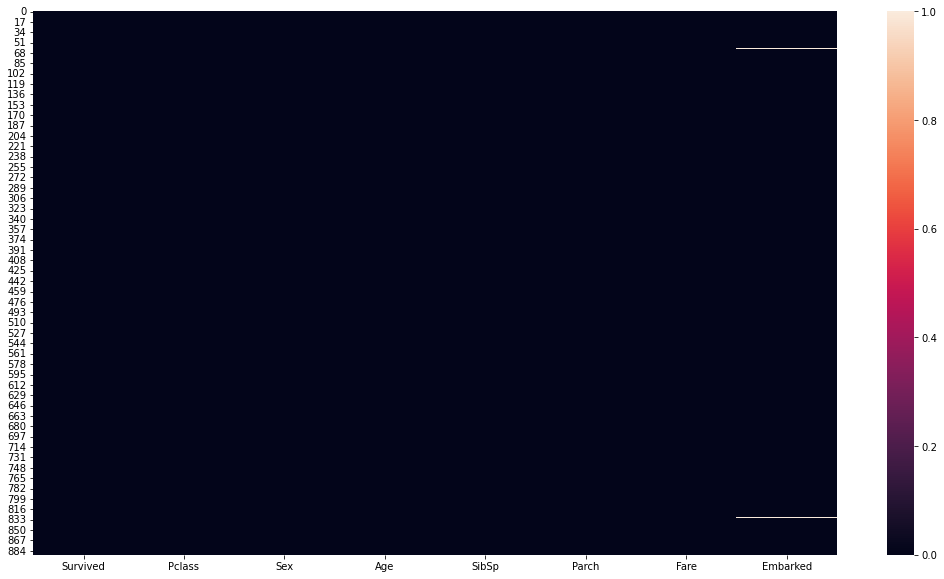

In [28]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [29]:
# dropping missing entries which were very less ( in embarked column)
df.dropna(inplace=True)

<AxesSubplot:>

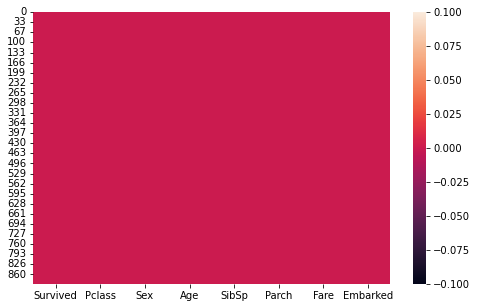

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))

In [31]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

string data processing / creating dummy for string

In [32]:
data= pd.get_dummies(df).drop('Sex_female',axis=1)

In [33]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [34]:
target = data[target_cols]
features = data.drop(target_cols,axis=1)

In [35]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [36]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

why we decided logistic regression?
1. initially we thought of doing with pairplot, but since its a categorical data in target, its not helpful
2. since its a binary categorical target and features are mixtures of numerical and cateofrical both , then i can think of logistic regression (classification)

# machine learning template

data splitting

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

Model creation and training

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [39]:
print(round(100*model.score(xtest, ytest)),'%')

83 %


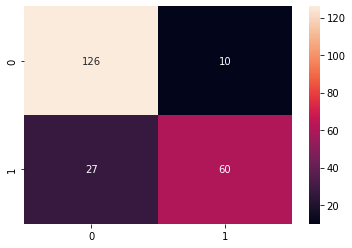

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [40]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix,  classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot=True, fmt='d')
plt.show()

print(classification_report(ytest, ytest_pred))

In [41]:
ytest.value_counts()

0    136
1     87
Name: Survived, dtype: int64

In [42]:
pd.Series(ytest_pred).value_counts()

0    153
1     70
dtype: int64

# Improving the model

1. by balancing the dataset
2. by hyperparameter tuning
3. cross validation

In [43]:
# Putting Class Weights
model1 = LogisticRegression(class_weight={0 : 0.9, 1 : 1.0}, random_state=101)
model1.fit(xtrain, ytrain)


print(classification_report(ytest, model1.predict(xtest)))


# this method didnt work

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       136
           1       0.85      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [44]:
# Hyperparameter
for algo in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    print(algo)
    model1 = LogisticRegression(random_state=101, solver=algo , tol =1 , C=0.0001)
    model1.fit(xtrain, ytrain)


    print(classification_report(ytest, model1.predict(xtest)))

newton-cg
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       136
           1       0.69      0.23      0.34        87

    accuracy                           0.66       223
   macro avg       0.67      0.58      0.56       223
weighted avg       0.67      0.66      0.60       223

lbfgs
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       136
           1       0.69      0.23      0.34        87

    accuracy                           0.66       223
   macro avg       0.67      0.58      0.56       223
weighted avg       0.67      0.66      0.60       223

liblinear
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       136
           1       0.76      0.36      0.48        87

    accuracy                           0.70       223
   macro avg       0.72      0.64      0.64       223
weighted avg       0.72      0.70      0.67     

In [45]:
# this model is not really improving so we shdnt cosider it as the 

# Decision Tree Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier().fit(xtrain, ytrain)
print(classification_report(ytest,model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       136
           1       0.67      0.69      0.68        87

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [57]:
pd.DataFrame(model_dt.feature_importances_, index = xtrain.columns, columns=['Importance']).sort_values(by= 'Importance', ascending=False)

,Importance
Sex_male,0.298897
Fare,0.255906
Age,0.248607
Pclass,0.101057
SibSp,0.052216
Parch,0.024615
Embarked_C,0.011978
Embarked_Q,0.005624
Embarked_S,0.001100


In [58]:
imp_cols = ['Sex_male','Fare','Age']

In [61]:
model_dt = DecisionTreeClassifier().fit(xtrain[imp_cols], ytrain)
print(classification_report(ytest,model_dt.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.78      0.74      0.75       136
           1       0.62      0.67      0.64        87

    accuracy                           0.71       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.71      0.71      0.71       223



In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(xtrain, ytrain)
print(classification_report(ytest,model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       136
           1       0.81      0.74      0.77        87

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [66]:
model_rf2 = RandomForestClassifier().fit(xtrain[imp_cols], ytrain)
print(classification_report(ytest,model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       136
           1       0.76      0.68      0.72        87

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223

